# Using titanic data tye to answer the following questions.

--- 
- ### section -1
    - How many passengers are there in the dataset?
    - What are the basic statistics (mean, median, etc.) of age, fare, and other numeric variables?
    - How many missing values are there in each column?
    - What is the distribution of passenger classes (pclass)?
    - How many passengers survived, and how many did not?
   --- 
- ### section -2
    - What is the overall survival rate among passengers?
    - How does survival rate vary by gender (sex)?
    - What is the survival rate for different passenger classes (pclass)?
    - How does age impact survival rate?
---    
- ### Section -3
    - What is the age distribution of passengers?
    - What is the average age of male and female passengers?
    - What is the distribution of age for each passenger class?
    
---
- ### Section -4
    - What is the distribution of passenger fares?
    - How does fare vary across different passenger classes?
    - Is there any correlation between fare and survival?
 ---
- ### Section -5
    - What is the distribution of passengers by the port of embarkation (embarked)?
    - Is there a correlation between passenger class and survival?
    - Are there any correlations between age, fare, and survival?
---

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
df = pd.concat([train, test], ignore_index=True)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Data Exploration
passenger_count = len(df)
basic_stats = df.describe()
missing_values = df.isnull().sum()
passenger_class_distribution = df['Pclass'].value_counts()
survival_counts = df['Survived'].value_counts()

In [16]:
overall_survival_rate = df['Survived'].mean()
survival_by_gender = df.groupby('Sex')['Survived'].mean()
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_age = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 50, 80]))['Survived'].mean()

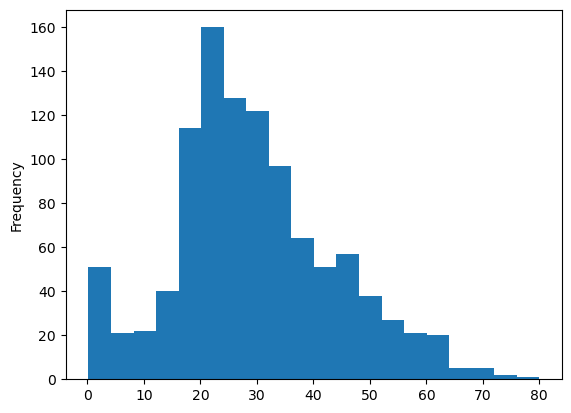

In [23]:
# Gender and Age Analysis
age_distribution = df['Age'].plot(kind='hist',bins=20)
average_age_by_gender = df.groupby('Sex')['Age'].mean()
age_by_class = df.groupby('Pclass')['Age'].mean()


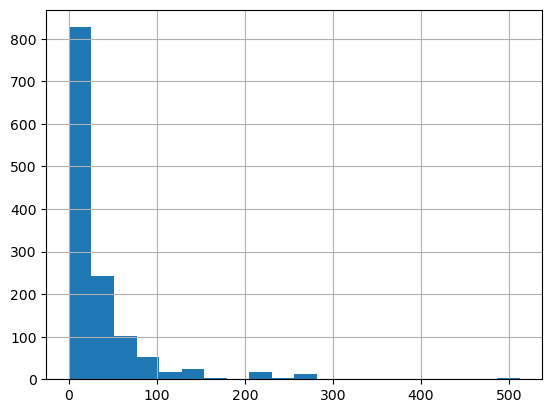

In [21]:
# Fare Analysis
fare_distribution = df['Fare'].hist(bins=20)
fare_by_class = df.groupby('Pclass')['Fare'].mean()
fare_vs_survival = df.groupby(pd.cut(df['Fare'], bins=[0, 50, 100, 150, 600]))['Survived'].mean()

In [25]:
embarked_distribution = df['Embarked'].value_counts()
correlation_matrix = df.corr()
correlation_survived = correlation_matrix['Survived'].sort_values(ascending=False)

C:\Users\91775\AppData\Local\Temp\ipykernel_11852\2156575204.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [27]:
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [26]:
correlation_survived

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [18]:
survival_by_age

Age
(0, 18]     0.503597
(18, 30]    0.355556
(30, 50]    0.423237
(50, 80]    0.343750
Name: Survived, dtype: float64

In [8]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [11]:
342/(342+549)

0.3838383838383838